In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

neo.model.models["Breathing"].breathing_enabled = False

# stabilize by calculating 60 seconds
neo.fastforward(30)


Ready in 1.9 sec. Average model step in 0.0321 ms.


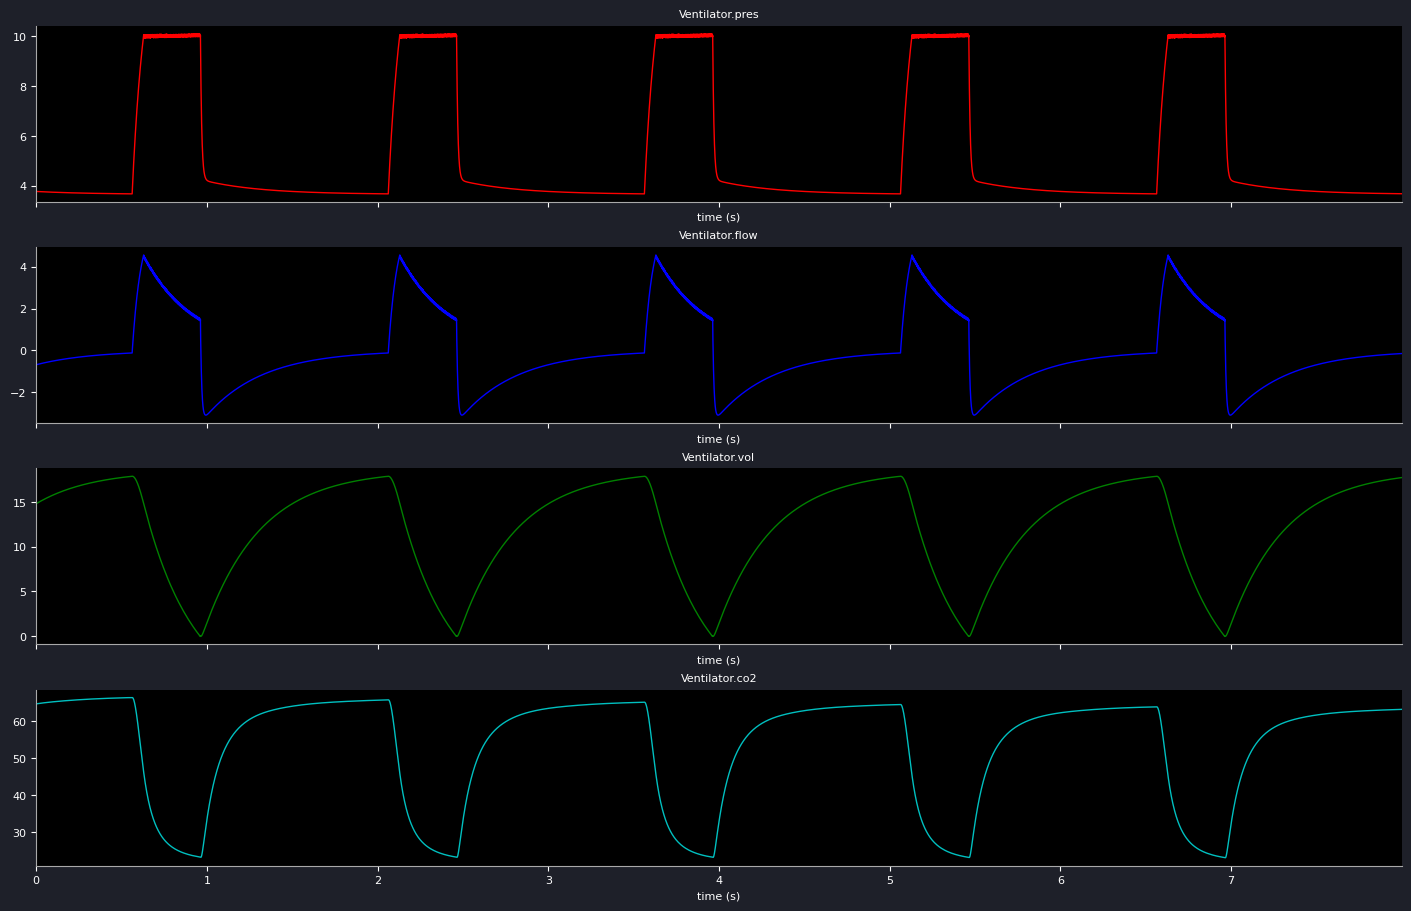


Ventilator.pres : max    10.1025, min    3.67177 mmHg
Ventilator.flow : net -1194.14854, forward 40554.07882, backward -41748.22736 ml/min, stroke volume:   -8.84499 ml/heartbeat, 
Ventilator.vol  : max 17922.35393, min  -56.96937 ml
Ventilator.co2  : max   66.42927 min   23.09763


In [7]:
neo.model.models["Ventilator"].switch_ventilator(True)
neo.model.models["Breathing"].breathing_enabled = False
neo.plot_time_graph(["Ventilator.pres","Ventilator.flow", "Ventilator.vol","Ventilator.co2"], time_to_calculate=8, combined=False, sharey=False, fill=False, sampleinterval=0.0005)

In [2]:
neo.fastforward(120)

Ready in 5.2 sec. Average model step in 0.0218 ms.


In [6]:
neo.analyze(["Ventilator.exp_tidal_volume"])


Ventilator.exp_tidal_volume: max    0.01796 min    0.01796


{}

In [ ]:
neo.get_bloodgas("AA")